<a href="https://colab.research.google.com/github/tabriznaghiyev/tensorflow/blob/main/preprocessing_first_steps_with_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data  - - - https://www.kaggle.com/datasets/mirichoi0218/**insurance**



In [ ]:
# Importing necessary libraries
import tensorflow as tf  # This is for machine learning algorithms
import numpy as np  # This is for numerical operations
import matplotlib.pyplot as plt  # This is for plotting graphs
import pandas as pd  # This is for data manipulation and analysis

# Reading the data from a CSV file hosted on GitHub
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')


In [ ]:
# Displaying the first 5 rows of the dataframe to check if it's loaded correctly
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Getting a concise summary of the dataframe including the data types and non-null values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Checking the shape of the DataFrame to see how many rows and columns it has
data_shape = data.shape

# Checking if there are any duplicate column names
data_columns_unique = data.columns.unique()

# Accessing specific columns in the DataFrame to presumably prepare for further analysis or manipulation
data_sex = data.sex
data_region = data.region
data_smoker = data.smoker


In [ ]:
print(f'Unique columns are: {data_columns_unique}')

Unique columns are: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [ ]:
print(f'Sex column: {data_sex} \n *** \n Region column: {data_region} \n *** \n Somker: {data_smoker}')

Sex column: 0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object 
 *** 
 Region column: 0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object 
 *** 
 Somker: 0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object


# Applying one-hot encoding to the categorical variables in the dataset

* Applies one-hot encoding to the DataFrame, which is a common preprocessing step for categorical data.

*   Splits the processed data into features **(X)** and target **
(y)**, where X contains all columns except **'charges'**, and y is just the **'charges'** column.

* Imports the train_test_split function and creates a training set and a testing set from X and y.

* Stores the lengths of the entire dataset, training set, and testing set to variables for further use or verification.

In [ ]:
# Applying one-hot encoding to the categorical variables in the dataset
# This converts categorical variables into a form that could be provided to ML algorithms to do a better job in prediction
data_one_hot = pd.get_dummies(data)

# The resulting dataframe now has additional columns for each category in the original categorical columns

# Splitting the dataset into features (X) and target (y) for machine learning
# Dropping the 'charges' column from the features as it is the target variable
X = data_one_hot.drop("charges", axis=1)
# The target variable is just the 'charges' column
y = data_one_hot.charges

# Importing the train_test_split function from the scikit-learn library
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets
# Setting aside 20% of the data for testing, using a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the length of the overall dataset, training set, and testing set to verify the split
len_dataset = len(X)
len_train_set = len(X_train)
len_test_set = len(X_test)


In [ ]:
data_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
len_dataset,len_train_set,len_test_set

(1338, 1070, 268)

In [ ]:
# Set the random seed for reproducibility of results
tf.random.set_seed(42)

# Define a Sequential model
data_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10),  # First hidden layer with 10 neurons and default activation function
        tf.keras.layers.Dense(1)    # Output layer with 1 neuron (since this is likely a regression problem)
    ]
)

# Compile the model
# Using Mean Absolute Error (MAE) as the loss function, which is common for regression problems
# The optimizer is set to Stochastic Gradient Descent (SGD)
data_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']  # The metric to evaluate during training is also MAE
)

# Train the model on the training data
# The model will use the feature data (X_train) and the target values (y_train) to learn
# Training will run for 100 epochs, which means the learning process will go through the data 100 times
data_model.fit(X_train, y_train, epochs=100,verbose=0)


The script initializes the TensorFlow random number generator with a seed to ensure that the results are the same each time the code is run. It then defines a neural network with a sequential model: one hidden layer with 10 neurons, and an output layer with 1 neuron, suitable for a regression problem. The model is compiled with the mean absolute error as the loss function and stochastic gradient descent as the optimizer. Finally, it is trained with the training data over 100 epochs.


In [ ]:
# Display the model's architecture including the layers, output shapes, and number of parameters
data_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                120       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate the model using the testing data set
# This will provide the loss and mean absolute error on the test data
data_model_evaluation = data_model.evaluate(X_test, y_test)
# The results are stored in the evaluation_results variable, which will have the loss and the metric (mae)


9/9 [==============================] - 0s 4ms/step - loss: 8557.1543 - mae: 8557.1543


In [ ]:
# Retrieve and display the median and mean of the training set target values (charges)
# This is useful to compare against the model's mean absolute error
median_of_y_train = y_train.median()
mean_of_y_train = y_train.mean()

median_of_y_train,mean_of_y_train

(9575.4421, 13346.089736364485)

In [ ]:
# Set the random seed again for reproducibility
tf.random.set_seed(42)

# Define a second Sequential model with a different architecture or hyperparameters
data_model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),  # First hidden layer with 100 neurons
        tf.keras.layers.Dense(10),   # Second hidden layer with 10 neurons
        tf.keras.layers.Dense(1)     # Output layer with 1 neuron for regression output
    ]
)

# Compile the second model
# This time using the Adam optimizer, which is an alternative to SGD and often performs better
data_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

data_model_2.fit(X_train, y_train, epochs=100, verbose=0)

The ***summary()*** method is used to print a summary of the neural network's architecture.

The ***evaluate()*** method is used to determine the model's performance on the test data, giving us the loss and mean absolute error.

The **median** and **mean** of the target variable in the training set are calculated, which can be useful for understanding the distribution of your data and setting a baseline for model performance.

A second model is initialized with a different structure, this time including an additional hidden layer. It uses the Adam optimizer for training instead of SGD. The model is then trained on the training data for 100 epochs without output logs (verbose=0).

In [ ]:
# Evaluate the performance of the second model on the test dataset
data_model_2_evaluation = data_model_2.evaluate(X_test, y_test)
# The evaluate function returns the loss value & metrics values for the model in test mode.


9/9 [==============================] - 0s 5ms/step - loss: 4813.7622 - mae: 4813.7622


In [ ]:
# Set the random seed to ensure reproducibility
tf.random.set_seed(42)

# Define the third model with two hidden layers
data_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),  # First hidden layer with 100 neurons
    tf.keras.layers.Dense(10),   # Second hidden layer with 10 neurons
    tf.keras.layers.Dense(1)     # Output layer with 1 neuron for regression output
])

# Compile the third model with Mean Absolute Error as the loss function and Adam optimizer
data_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']  # Monitor MAE during training
)

# Train the model for 200 epochs without printing out progress (verbose=0)
history = data_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
# Evaluate the performance of the third model on the test dataset
data_model_3_evaluation = data_model_3.evaluate(X_test, y_test)
# Outputs the loss and MAE after model evaluation on the test set.


9/9 [==============================] - 0s 2ms/step - loss: 3502.1589 - mae: 3502.1589


Text(0.5, 0, 'Epochs')

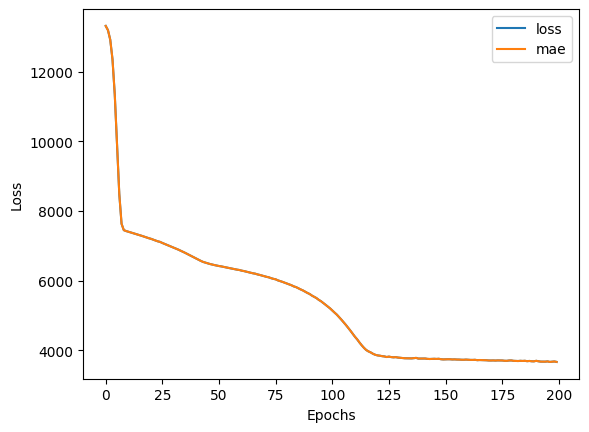

In [ ]:
# Plot the training history, which includes the loss over the epochs
pd.DataFrame(history.history).plot()  # Convert the history dictionary to a DataFrame and plot it
plt.ylabel("Loss")  # Set the y-axis label to "Loss"
plt.xlabel("Epochs")  # Set the x-axis label to "Epochs"

**Normalization and Standardization**

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


<Axes: ylabel='Frequency'>

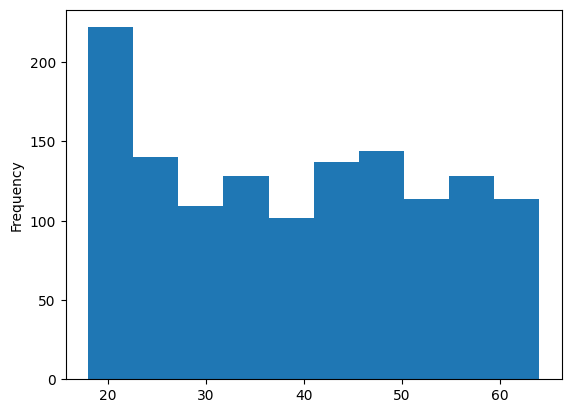

In [ ]:
X.age.plot(kind='hist')

<Axes: ylabel='Frequency'>

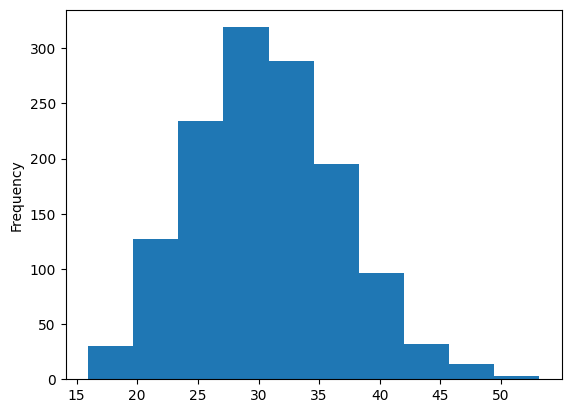

In [ ]:
X.bmi.plot(kind='hist')

In [ ]:
X.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Import necessary modules from scikit-learn for preprocessing and splitting the dataset
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a ColumnTransformer to apply different preprocessing to different columns
# MinMaxScaler is applied to 'age', 'bmi', and 'children' columns to scale them to a range [0, 1]
# OneHotEncoder is applied to 'sex', 'smoker', 'region' columns to convert categorical data into one-hot encoded vectors
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Split the dataset into features and target variable
# The 'charges' column is the target variable
X = insurance.drop("charges", axis=1)
y = insurance.charges

# Split the dataset into training and testing sets
# 20% of the data is reserved for testing, and the split is reproducible due to the random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer on the training data
ct.fit(X_train)

# Apply the transformations to the training and testing data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Display the first row of the original training set to see the raw values
print(X_train.iloc[0])
print('\n')
# Display the first row of the transformed training set to see the scaled and encoded values
print(X_train_normal[0])

age                46
sex            female
bmi             19.95
children            2
smoker             no
region      northwest
Name: 560, dtype: object


[0.60869565 0.10734463 0.4        1.         0.         1.
 0.         0.         1.         0.         0.        ]


In [ ]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# Define a new Sequential model with two hidden layers
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),  # First hidden layer with 100 neurons
    tf.keras.layers.Dense(10),   # Second hidden layer with 10 neurons
    tf.keras.layers.Dense(1)     # Output layer with 1 neuron for regression output
])

# Compile the model with Mean Absolute Error as the loss function and Adam optimizer
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']  # Monitor MAE during training
)

# Train the model on the normalized training data for 100 epochs
insurance_model_4.fit(X_train_normal, y_train, epochs=100,verbose=0)

In [ ]:
# Evaluate the model's performance on the normalized test data
# The function returns the loss and the mean absolute error (mae)
insurance_model_4_evaluation = insurance_model_4.evaluate(X_test_normal, y_test)


9/9 [==============================] - 0s 4ms/step - loss: 3442.2458 - mae: 3442.2458


In [ ]:
data_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               1200      
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
insurance_model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               1200      
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
